<a href="https://colab.research.google.com/github/lauragabrysiak/mitx_applied_data_science/blob/main/mitx_applied_ds_foodhub_lgg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 60**

Student: Laura Gabrysiak
Date: 11/12/2023

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [5]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [6]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# from pandas_profiling import ProfileReport
# https://plainenglish.io/blog/how-to-use-pandas-profiling-on-google-colab-e34f34ff1c9f

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Seaborn config
sequential_colors = sns.color_palette("RdPu", 10)
diverging_colors = sns.color_palette("RdBu", 10)
colors = sns.color_palette("viridis", len("rating"))

sns.set_style('whitegrid') #darkgrid
sns.set(font_scale=0.5)

### Understanding the structure of the data

In [8]:
# read the data
df = pd.read_csv('/content/sample_data/foodhub_order.csv')
print(df.sample(3),"\n")
print(df.info())

      order_id  customer_id              restaurant_name cuisine_type  \
1821   1478364       273690  Grand Sichuan International      Chinese   
8      1477174       121706           Anjappar Chettinad       Indian   
1179   1476804       113477  Schnipper's Quality Kitchen     American   

      cost_of_the_order day_of_the_week     rating  food_preparation_time  \
1821              32.93         Weekend  Not given                     32   
8                 16.44         Weekday          5                     21   
1179              12.18         Weekend  Not given                     31   

      delivery_time  
1821             28  
8                26  
1179             22   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   in

#### Observations:

The DataFrame has 9 columns. Each row describes the order transaction and every column includes customer, order and restaurant information.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [9]:
# Write your code here
# df.shape
print('The data frame has', df.shape[0],'rows and', df.shape[1],'columns')

The data frame has 1898 rows and 9 columns


#### Observations:

The dataframe has 1898 rows and 9 columns

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [10]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:

The data has variables of the type: numerical [int, float] and categorical [object]

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [11]:
# Write your code here
#print(df.isna().sum())
print(df.isnull().sum(),"\n")

# Replacing 'Not given' as categorical variable
df['rating'] = df['rating'].replace(['Not given'],0)
df = df.astype({"rating": float, "order_id": object, "customer_id": object})
df.info()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   object 
 1   customer_id            1898 non-null   object 
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   float64
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 133.6+ KB


#### Observations:
Depends how the missing values are defined. The data itself had no missing values - using df.isna or is.null() however once we look at the value distribution of the variable rating we can infer that some information is missing 'No rating'.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [12]:
# Write your code here
print(df.describe(include='object').transpose(),"\n")
print(df.describe(exclude='object').transpose())

                count unique          top  freq
order_id         1898   1898      1477147     1
customer_id      1898   1200        52832    13
restaurant_name  1898    178  Shake Shack   219
cuisine_type     1898     14     American   584
day_of_the_week  1898      2      Weekend  1351 

                        count       mean       std    min    25%    50%  \
cost_of_the_order      1898.0  16.498851  7.483812   4.47  12.08  14.14   
rating                 1898.0   2.659642  2.195280   0.00   0.00   4.00   
food_preparation_time  1898.0  27.371970  4.632481  20.00  23.00  27.00   
delivery_time          1898.0  24.161749  4.972637  15.00  20.00  25.00   

                           75%    max  
cost_of_the_order      22.2975  35.41  
rating                  5.0000   5.00  
food_preparation_time  31.0000  35.00  
delivery_time          28.0000  33.00  


#### Observations:

The statistical summary for all numerical and categorical variables has been providad using the method describe(). The summary for categorical variables includes total instance count, unique values, and most freq values (top) with its frequency (freq). The statistical summary for numerical variables includes total count so as the main statistical features: min, mean and max values so as the quartile thresholds.

### **Question 5:** How many orders are not rated? [1 mark]

In [13]:
# Write the code here
np.unique(df['rating'], return_counts=True) #736

(array([0., 3., 4., 5.]), array([736, 188, 386, 588]))

In [14]:
df['rating'].value_counts(dropna=False)

0.0    736
5.0    588
4.0    386
3.0    188
Name: rating, dtype: int64

#### Observations:

There are several ways of solving this - The variable 'rating' was originally as ordinal variable and had to be changed to numerical. If kept as a categorical a freq list can be done if else than looking for all values of '0' as defined will provide the solution.

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

In [15]:
#total variables
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   object 
 1   customer_id            1898 non-null   object 
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   float64
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 133.6+ KB
None


#### 6.1 Numerical Variables Univariate EDA


In [16]:
df.describe(exclude='object').transpose()

,count,mean,std,min,25%,50%,75%,max
cost_of_the_order,1898.0,16.498851,7.483812,4.47,12.08,14.14,22.2975,35.41
rating,1898.0,2.659642,2.195280,0.00,0.00,4.00,5.0000,5.00
food_preparation_time,1898.0,27.371970,4.632481,20.00,23.00,27.00,31.0000,35.00
delivery_time,1898.0,24.161749,4.972637,15.00,20.00,25.00,28.0000,33.00


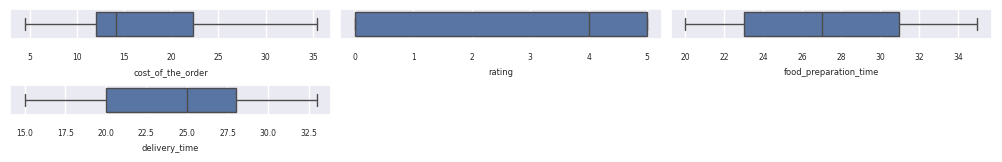

In [17]:
# Univariate Analysis: Numerical Variables [int/float types]

cols = 3
rows = 3

num_cols = df.select_dtypes(exclude='object').columns

fig = plt.figure(figsize= (10,2))

for i, col in enumerate(num_cols):
    ax=fig.add_subplot( rows, cols, i+1)
    sns.boxplot(x=df[col], ax=ax)
    #sns.histplot(x=df[col], ax = ax)

fig.tight_layout()
plt.show()

In [18]:
order_num = df['customer_id'].value_counts()
cust_num = order_num.value_counts()
order_num = np.sort(order_num.unique())

# create freq matrix
d = {'Order Count': order_num
     , 'Num of Customers': cust_num
     ,'Num of Customers %': round(cust_num / sum(cust_num),2) #* 100
     }
freq = pd.DataFrame(data = d)
print(freq, "\n")
# Obs: Most of customers order 1 time

    Order Count  Num of Customers  Num of Customers %
1             1               784                0.65
2             2               267                0.22
3             3                83                0.07
4             4                33                0.03
5             5                19                0.02
6             6                 6                0.00
7             7                 4                0.00
13            8                 1                0.00
10            9                 1                0.00
9            10                 1                0.00
8            13                 1                0.00 



In [19]:
## Check details of repeating customers
repeat_customers = df['customer_id'].value_counts()[df['customer_id'].value_counts() > 1].index
filtered_df = df[df['customer_id'].isin(repeat_customers)]

# Create a table of value combinations with frequencies
table = pd.crosstab(index=filtered_df['customer_id'], columns=filtered_df['cuisine_type'], margins=True, margins_name='Total')
table.sort_values(by = "Total", ascending=False).head(5)

cuisine_type,American,Chinese,French,Indian,Italian,Japanese,Korean,Mediterranean,Mexican,Middle Eastern,Southern,Spanish,Thai,Vietnamese,Total
customer_id,,,,,,,,,,,,,,,
Total,324,118,15,46,161,309,10,26,38,32,9,9,11,6,1114
52832,1,2,1,2,0,3,1,0,1,2,0,0,0,0,13
47440,10,0,0,0,0,0,0,0,0,0,0,0,0,0,10
83287,4,0,0,0,0,4,0,0,0,0,0,1,0,0,9
250494,6,0,0,0,2,0,0,0,0,0,0,0,0,0,8


In [20]:
total_orders = len(df)

# Probability of ordering from another subcategory given the current subcategory
prob_another_subcategory = df.groupby('cuisine_type').apply(lambda group: group['cuisine_type'].eq(group['cuisine_type'].iloc[0]).mean())
prob_same_subcategory = 1 - prob_another_subcategory

# Display the probabilities
result_df = pd.DataFrame({
    'Subcategory': prob_another_subcategory.index,
    'Probability Other cat': prob_another_subcategory.values,
    'Probability Same cat': prob_same_subcategory.values
})

print(result_df)

       Subcategory  Probability Other cat  Probability Same cat
0         American                    1.0                   0.0
1          Chinese                    1.0                   0.0
2           French                    1.0                   0.0
3           Indian                    1.0                   0.0
4          Italian                    1.0                   0.0
5         Japanese                    1.0                   0.0
6           Korean                    1.0                   0.0
7    Mediterranean                    1.0                   0.0
8          Mexican                    1.0                   0.0
9   Middle Eastern                    1.0                   0.0
10        Southern                    1.0                   0.0
11         Spanish                    1.0                   0.0
12            Thai                    1.0                   0.0
13      Vietnamese                    1.0                   0.0


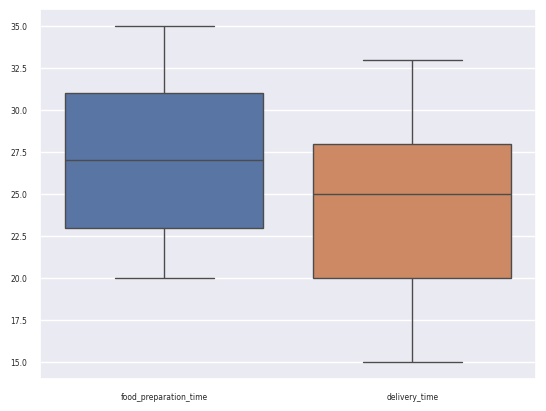

In [21]:
# food preparatrion together with delivery time

sns.boxplot(data=df.loc[:, ['food_preparation_time', 'delivery_time']])

fig.tight_layout()
plt.show()

##### IDs Variables

In [22]:
##### IDs

# order_id

# customer_id

#### 6.2 - Categorical Variables Univariate EDA

In [23]:
df.describe(include='object').transpose()

,count,unique,top,freq
order_id,1898,1898,1477147,1
customer_id,1898,1200,52832,13
restaurant_name,1898,178,Shake Shack,219
cuisine_type,1898,14,American,584
day_of_the_week,1898,2,Weekend,1351


<ipython-input-24-7c2b13414390>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col]
<ipython-input-24-7c2b13414390>:16: UserWarning: 
The palette list has fewer values (6) than needed (14) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x=df[col]
<ipython-input-24-7c2b13414390>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col]
<ipython-input-24-7c2b13414390>:16: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.countplot(x=df[col]


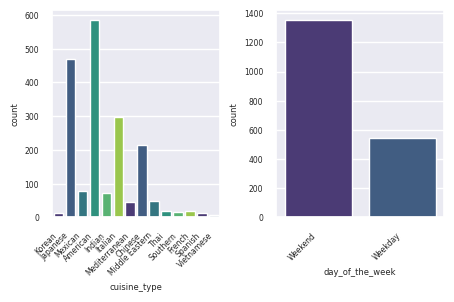

In [24]:
# Visualizing categorical variables with values <=15 unique categories

cols = 4
rows = 1

fig = plt.figure(figsize= (9,3))

all_cats = df.select_dtypes(include='object')
cat_cols = all_cats.columns[all_cats.nunique() < 15]

for i, col in enumerate(cat_cols):
    ax=fig.add_subplot(rows
                       , cols
                       , i+1
                       )
    sns.countplot(x=df[col]
                  , ax=ax
                  , palette = colors)
    plt.xticks(rotation=45, ha='right')

fig.tight_layout()
plt.show()

In [25]:
#groupby(var, name = '')

# Top Restaurants (order_count & total_cost)
top_restaurants = (df.groupby('restaurant_name')['cost_of_the_order'].agg(['sum','count']).sort_values(['sum','count'],ascending=False).reset_index().head(5))
print("Top restaurants:\n", top_restaurants,"\n\n")

# Top customers (order_count & total_cost)
top_customers = df.groupby('customer_id')['cost_of_the_order'].agg(['sum','count']).sort_values(['sum','count'],ascending=False).reset_index().head(5)
print("Top customers types:\n", top_customers,"\n\n")

# Top days(order_count & total_cost)
top_days = df.groupby('day_of_the_week')['cost_of_the_order'].agg(['sum','count']).sort_values(['sum','count'],ascending=False).reset_index().head(5)
print("Top Days:\n",top_days,"\n")

# Top cuisine (order_count & total_cost)
top_cuisine = df.groupby('cuisine_type')['cost_of_the_order'].agg(['sum','count']).sort_values(['sum','count'],ascending=False).reset_index().head(5)
print("Top cuisine types:\n", top_cuisine,"\n\n")

Top restaurants:
              restaurant_name      sum  count
0                Shake Shack  3579.53    219
1          The Meatball Shop  2145.21    132
2          Blue Ribbon Sushi  1903.95    119
3  Blue Ribbon Fried Chicken  1662.29     96
4                       Parm  1112.76     68 


Top customers types:
    customer_id     sum  count
0        52832  225.80     13
1       250494  183.83      8
2        47440  158.18     10
3       276192  146.46      7
4        83287  139.31      9 


Top Days:
   day_of_the_week       sum  count
0         Weekend  22392.60   1351
1         Weekday   8922.22    547 

Top cuisine types:
   cuisine_type      sum  count
0     American  9530.78    584
1     Japanese  7663.13    470
2      Italian  4892.77    298
3      Chinese  3505.62    215
4      Mexican  1303.85     77 




<ipython-input-26-eddf30fa0611>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='restaurant_name'
<ipython-input-26-eddf30fa0611>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='customer_id'
<ipython-input-26-eddf30fa0611>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='day_of_the_week'
<ipython-input-26-eddf30fa0611>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='cuisine_ty

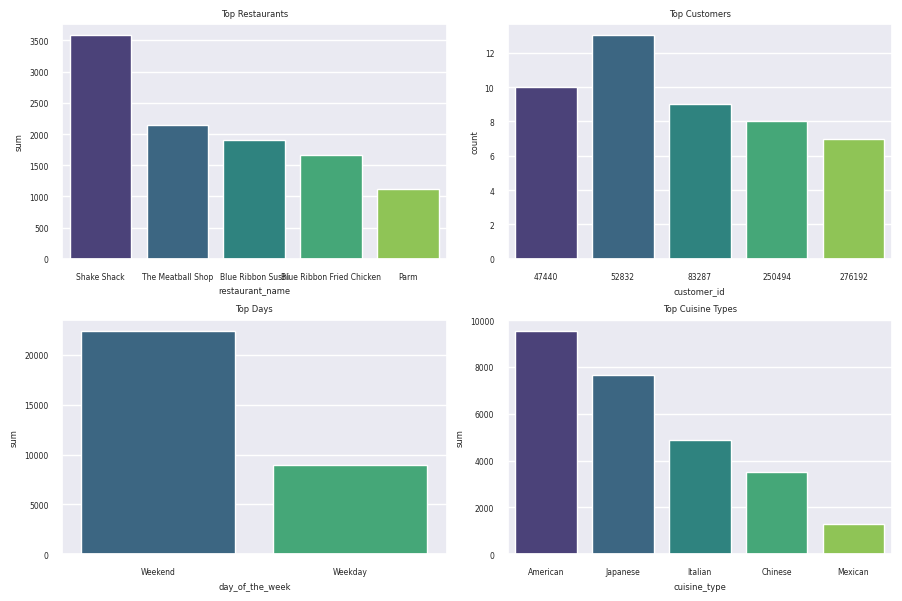

In [26]:
# Create a 2x3 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(9, 6))

# Plot data in the first subplot
colors = sns.color_palette("viridis", len(top_restaurants))

sns.barplot(x='restaurant_name'
            , y='sum'
            , data=top_restaurants
            , palette=colors
            , ax=axes[0, 0])
axes[0, 0].set_title('Top Restaurants')

# Plot data in the second subplot
colors = sns.color_palette("viridis", len(top_customers))
sns.barplot(x='customer_id'
            , y='count'
            , data=top_customers
            , palette=colors
            , ax=axes[0, 1])
axes[0, 1].set_title('Top Customers')

# Plot data in the third subplot
colors = sns.color_palette("viridis", len(top_days))
sns.barplot(x='day_of_the_week'
            , y='sum'
            , data=top_days
            , palette=colors
            , ax=axes[1, 0])
axes[1, 0].set_title('Top Days')

# Plot data in the fourth subplot
colors = sns.color_palette("viridis", len(top_cuisine))
sns.barplot(x='cuisine_type'
            , y='sum'
            , data=top_cuisine
            , palette=colors
            , ax=axes[1, 1])
axes[1, 1].set_title('Top Cuisine Types')

plt.tight_layout()
plt.show()

In [27]:
# Detailed Summary of variable "Cuisine Type" by cost of order or Sale Amount:
summary_by_class = df.groupby('cuisine_type')['cost_of_the_order'].agg(['count', 'mean', 'median', 'min', 'max', 'sum']).reset_index()
#summary_by_class.columns = ['Class', 'Count', 'Mean Sale', 'Median Sale',  'Total Sale']
print(round(summary_by_class.sort_values(by='count', ascending=False),1), '\n')

      cuisine_type  count  mean  median   min   max     sum
0         American    584  16.3    14.1   4.7  33.2  9530.8
5         Japanese    470  16.3    14.1   4.5  33.4  7663.1
4          Italian    298  16.4    14.5   5.0  33.0  4892.8
1          Chinese    215  16.3    14.1   4.8  34.2  3505.6
8          Mexican     77  16.9    15.6   4.8  33.3  1303.8
3           Indian     73  16.9    16.2   5.3  33.0  1235.1
9   Middle Eastern     49  18.8    16.3   5.8  32.9   922.2
7    Mediterranean     46  15.5    14.0   5.7  35.4   711.8
12            Thai     19  19.2    19.4   6.7  32.9   365.0
2           French     18  19.8    20.5  12.0  29.2   356.3
10        Southern     17  19.3    16.1   7.4  31.4   328.1
6           Korean     13  14.0    12.2   5.8  30.8   182.0
11         Spanish     12  19.0    16.5  12.1  29.1   227.9
13      Vietnamese      7  12.9    12.1   6.0  22.3    90.2 



0.9999018247034467


<Axes: xlabel='count', ylabel='sum'>

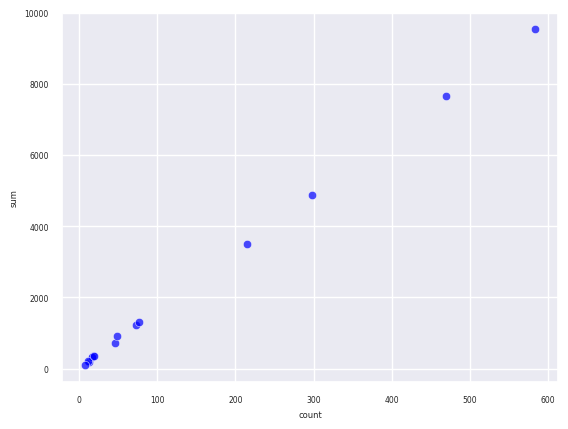

In [28]:
# Impact of Cuisine Type by Order and Total Sale
print(
    summary_by_class['count'].corr(summary_by_class['sum'])
)
sns.scatterplot(x='count'
                , y='sum'
                , data=summary_by_class
                , color='blue'
                , marker='o'
                , alpha=0.7)

# Obs: There is a linear

In [29]:
# Detailed Summary of variable "Cuisine Type" by cost of order or Sale Amount:
summary_by_class = df.groupby('day_of_the_week')['cost_of_the_order'].agg(['count', 'mean', 'median', 'sum']).reset_index()
#summary_by_class.columns = ['Class', 'Count', 'Mean Sale', 'Median Sale',  'Total Sale']

df1 = summary_by_class.sort_values(by='count', ascending=False)

print(round(df1,1))

  day_of_the_week  count  mean  median      sum
1         Weekend   1351  16.6    14.4  22392.6
0         Weekday    547  16.3    14.1   8922.2


In [30]:
# Differences btween Weekdays (5 days) and Weekends (2 days)

print("Weekend - Weekday % difference: \n")
print('count ratio', round((df1.loc[1][1] / df1.loc[0][1]) - 1, 2), 'x')
#print('mean ratio', (df1.loc[1][2] / df1.loc[0][2]) - 1)
#print('median ratio', (df1.loc[1][3] / df1.loc[0][3]) - 1)
print('sum ratio', round((df1.loc[1][4] / df1.loc[0][4]) - 1, 2), 'x')
print("\n\n")

Weekend - Weekday % difference: 

count ratio 1.47 x
sum ratio 1.51 x





### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [31]:
# Write the code here
q7 = df.groupby('restaurant_name')['cost_of_the_order'].agg(['sum','count']).sort_values(['sum','count']
                                                                                         ,ascending=False).head(5)
print("The 5 top restaurants are: \n", q7)

The 5 top restaurants are: 
                                sum  count
restaurant_name                          
Shake Shack                3579.53    219
The Meatball Shop          2145.21    132
Blue Ribbon Sushi          1903.95    119
Blue Ribbon Fried Chicken  1662.29     96
Parm                       1112.76     68


#### Observations:

The 5 top restaurants are:
                 
Shake Shack                     219
The Meatball Shop               132
Blue Ribbon Sushi               119
Blue Ribbon Fried Chicken        96
Parm                             68

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [32]:
# Write the code here
q8 = df.groupby(['day_of_the_week'])['cuisine_type'].value_counts()

print("The most popular cuisines during the weekend are: \n", q8.tail(14))

The most popular cuisines during the weekend are: 
 day_of_the_week  cuisine_type  
Weekend          American          415
                 Japanese          335
                 Italian           207
                 Chinese           163
                 Mexican            53
                 Indian             49
                 Mediterranean      32
                 Middle Eastern     32
                 Thai               15
                 French             13
                 Korean             11
                 Southern           11
                 Spanish            11
                 Vietnamese          4
Name: cuisine_type, dtype: int64


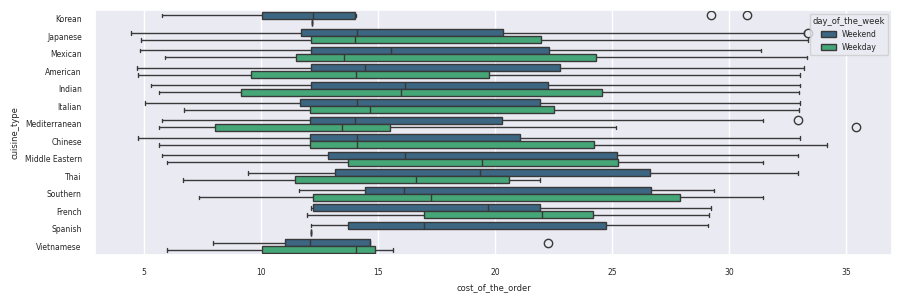

In [33]:
# Write the code here
colors = sns.color_palette("viridis", 2)
fig = plt.figure(figsize= (9,3))
sns.boxplot(x = df['cost_of_the_order']
            , y = df['cuisine_type']
            , hue = df['day_of_the_week']
            , palette=colors
            )

fig.tight_layout()
plt.show()

#### Observations:
Again we can see that sales are much higher on the weekends cross-cuisine with exceptions of Middle Eastern cuisine, Southern cuisine and Vietnamese (if we take the median as comparisson). Since the transactions are not itemized we cannot control of the sale diff is given by type of menu item or amount of items ordered.

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [34]:
# Write the code here

percentage = (df[df['cost_of_the_order'] > 20].shape[0] / df.shape[0]) * 100
print("Percentage of orders that cost more than 20 dollars:\n", round(percentage), "%")

Percentage of orders that cost more than 20 dollars:
 29 %


### **Question 10**: What is the mean order delivery time? [1 mark]

In [35]:
# Write the code here
print("Avg order delivery time:\n",  round(df['delivery_time'].mean()), "min")

Avg order delivery time:
 24 min


#### Observations:


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [36]:
# Write the code here

dfa = df.groupby("customer_id").agg({"order_id": "count"}).sort_values("order_id", ascending=False).head(3)
print("Top 3 customers:\n\n", dfa)

Top 3 customers:

              order_id
customer_id          
52832              13
47440              10
83287               9


#### Observations:


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


Some of the main questions to cover/answer:

1.   Are there any relations between the variables: cat - cat, num - num, cat - num
1.   Are there any significant diff btw weekends and weekdays (sum/count)
1.   Are there any significant diff cuisine type (sum/count)
1.   Are there any significant diff rating classes (sum/count)



                       cost_of_the_order    rating  food_preparation_time  \
cost_of_the_order               1.000000  0.049531               0.041527   
rating                          0.049531  1.000000               0.001156   
food_preparation_time           0.041527  0.001156               1.000000   
delivery_time                  -0.029949 -0.003888               0.011094   

                       delivery_time  
cost_of_the_order          -0.029949  
rating                     -0.003888  
food_preparation_time       0.011094  
delivery_time               1.000000  
                       cost_of_the_order    rating  food_preparation_time  \
cost_of_the_order              56.007444  0.813747               1.439700   
rating                          0.813747  4.819256               0.011752   
food_preparation_time           1.439700  0.011752              21.459878   
delivery_time                  -1.114537 -0.042441               0.255564   

                       delivery_t

<ipython-input-37-770812482a84>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.corr())
<ipython-input-37-770812482a84>:3: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.cov())
<ipython-input-37-770812482a84>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr()


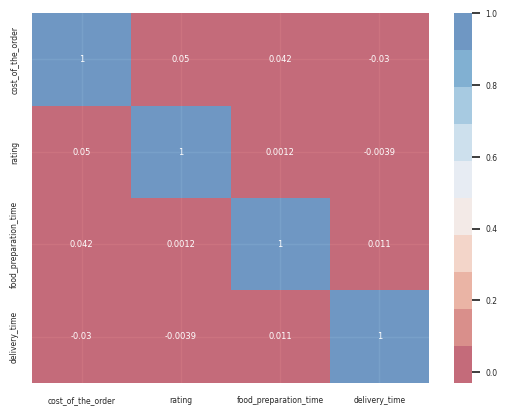

In [37]:
# Write the code here
print(df.corr())
print(df.cov())
sns.heatmap(df.corr()
            , cmap = diverging_colors
            , annot= True
            , alpha=0.6)
plt.show()

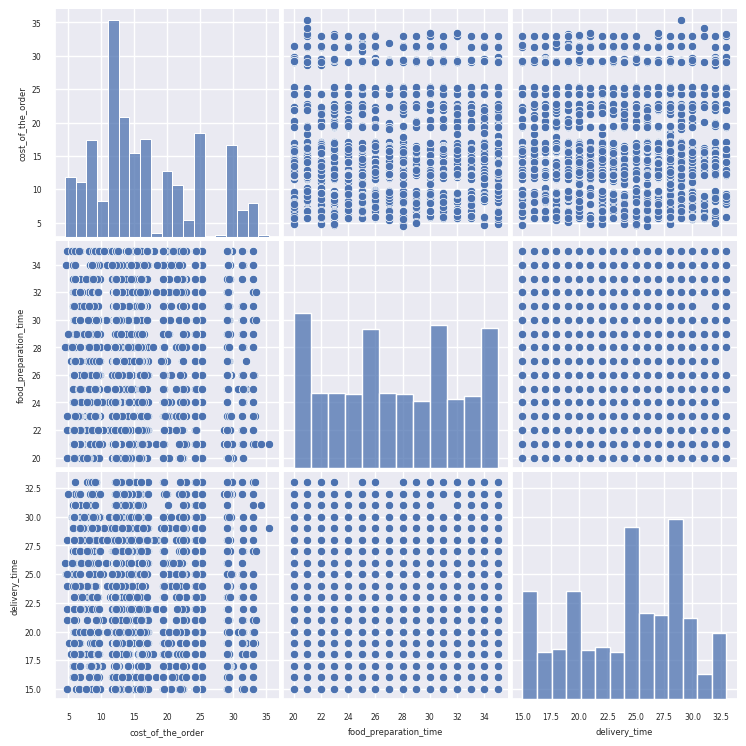

In [38]:
sns.pairplot(data = df[['cost_of_the_order', 'food_preparation_time', 'delivery_time']])
plt.show()

Observations: There are no significant linear relationships between the variables.


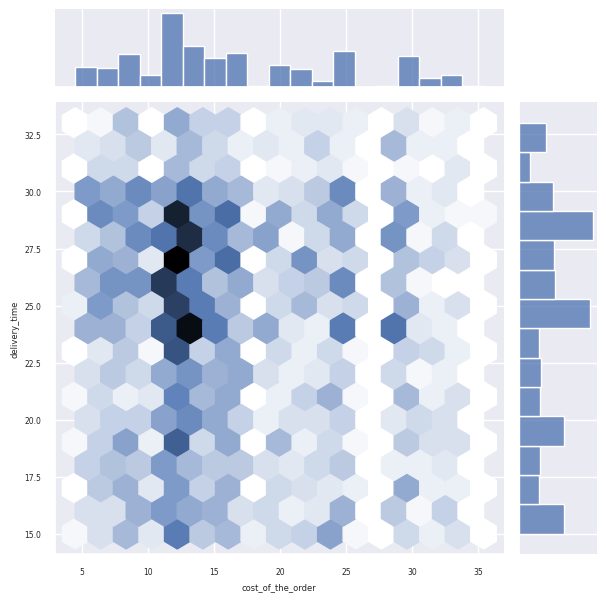

In [39]:
sns.jointplot(data = df
              , x = 'cost_of_the_order'
              , y = 'delivery_time'
              , palette = colors
              , kind = 'hex')

# Obs: Most orders density are $12 within a range of about 23 - 28 min delivery time.

<ipython-input-42-f3137bc6f40d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df


<Axes: xlabel='restaurant_name', ylabel='cost_of_the_order'>

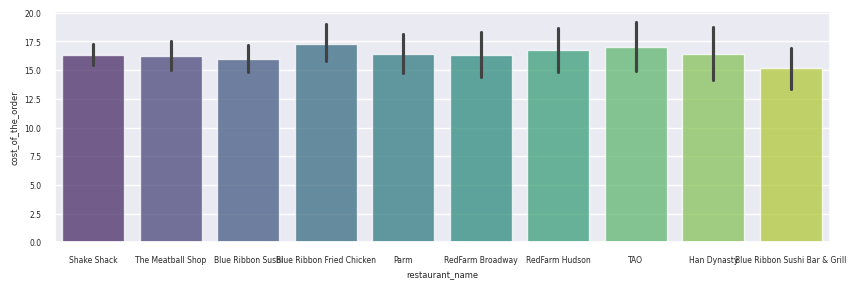

In [42]:
# restaurants by cost_of_order
colors = sns.color_palette("viridis", 10)

plt.figure(figsize = (10,3))
sns.barplot(data = df
            , x = 'restaurant_name'
            , y = 'cost_of_the_order'
            , order = df.restaurant_name.value_counts().iloc[:10].index
            , palette = colors
            , alpha = 0.75)

# Observation: Top restaurants are not specifically determined by their price.

<ipython-input-43-f1118e9c35b6>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df


<Axes: xlabel='cuisine_type', ylabel='cost_of_the_order'>

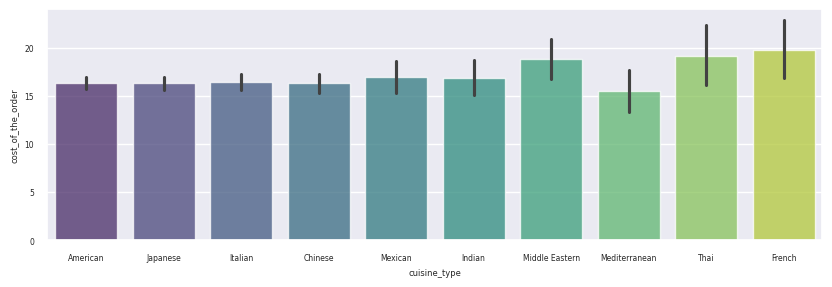

In [43]:
colors = sns.color_palette("viridis", 10)
plt.figure(figsize = (10,3))

sns.barplot(data = df
            , x = 'cuisine_type'
            , y = 'cost_of_the_order'
            , order = df.cuisine_type.value_counts().iloc[:10].index # Get the top 10 most popular cuisines
            , palette = colors
            , alpha = 0.75)

# Observation: Most popular cuisines do seem to have lower cost of order. Given that the orders are not itemized we cannot conclude if the prices are cheaper or if the order sale is given by the type of order

<ipython-input-44-d106cf310c91>:4: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  sns.countplot(data = df


<Axes: xlabel='cuisine_type', ylabel='count'>

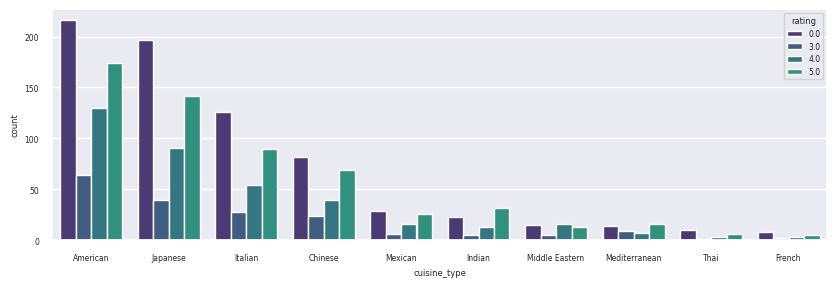

In [44]:
colors = sns.color_palette("viridis", len("rating"))
plt.figure(figsize = (10,3))

sns.countplot(data = df
              , x = 'cuisine_type'
              , hue = 'rating'
              , palette = colors
              , order = df.cuisine_type.value_counts().iloc[:10].index) # Get the top 10 most popular cuisines

<ipython-input-45-a764c89f3dfd>:2: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.histplot(data = df


<Axes: xlabel='cost_of_the_order', ylabel='Count'>

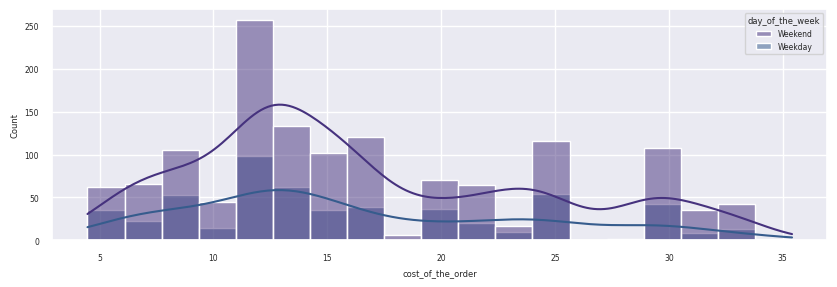

In [45]:
plt.figure(figsize = (10,3))
sns.histplot(data = df
             , x = 'cost_of_the_order'
             , hue = 'day_of_the_week'
             , palette = colors
             , kde = True)

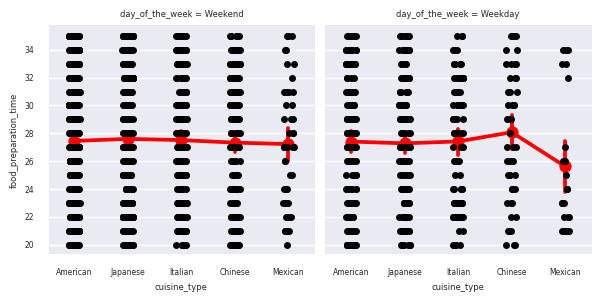

In [46]:
#sns.catplot(data = df
#            , x = 'cuisine_type'
#            , y = 'food_preparation_time'
#            , kind = 'point'
#            , order = df.cuisine_type.value_counts().iloc[:10].index) # Get the top 10 most popular cuisines)
#plt.xticks(rotation=90)
#plt.show();

#sns.set_theme(style="ticks")
#exercise = sns.load_dataset("exercise")

g = sns.FacetGrid(df
                , col="day_of_the_week")

g.map_dataframe(sns.stripplot
                , x="cuisine_type"
                #, y="cost_of_the_order"
                , y="food_preparation_time"
                , color="black"
                , order=df.cuisine_type.value_counts().iloc[:5].index)

g.map_dataframe(sns.pointplot
                , x="cuisine_type"
                #, y="cost_of_the_order"
                , y="food_preparation_time"
                , color="red"
                , order=df.cuisine_type.value_counts().iloc[:5].index)

g.set_axis_labels("cuisine_type", "food_preparation_time")

# Observations: the distribution of the different y axis values are almost constantly distributed

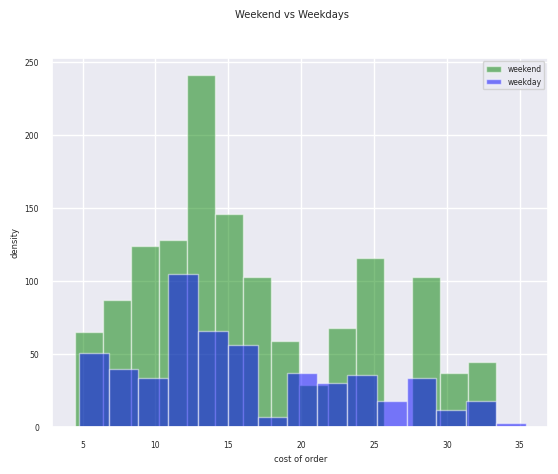

In [47]:
fig, ax = plt.subplots()

ax.hist(df[df["day_of_the_week"]== 'Weekend']["cost_of_the_order"], bins=15, alpha=0.5, color="green", label="weekend")
ax.hist(df[df["day_of_the_week"]== 'Weekday']["cost_of_the_order"], bins=15, alpha=0.5, color="blue", label="weekday")

ax.set_xlabel("cost of order")
ax.set_ylabel("density")
fig.suptitle("Weekend vs Weekdays")
ax.legend();

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [48]:
# Write the code here
#Create a data set of Restaurants with a consideration of mean rating greater than 4. The rating eliminates all unrated rows in calculating the mean
df2 = df[['restaurant_name','rating']][df['rating']!= 0].groupby('restaurant_name').mean()> 4
#..and reset the index
df2.reset_index(inplace=True)
# Create a data set of Restaurants with a consideration of count of rating greate than 50.Equally in this case unrated orders are not considered.
df3 = df[['restaurant_name','rating']][df['rating']!= 0].groupby('restaurant_name').count()> 50
#..and reset the index
df3.reset_index(inplace=True)
# Create a set of Restaurants that meet both conditions using merge
qualified_restaurants = pd.merge(df3[df3['rating']== True], df2[df2['rating']== True],on ='restaurant_name')
# Return the set of qualified restaurants only
qualified_restaurants

,restaurant_name,rating_x,rating_y
0,Blue Ribbon Fried Chicken,True,True
1,Blue Ribbon Sushi,True,True
2,Shake Shack,True,True
3,The Meatball Shop,True,True


#### Observations:


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [49]:
# Write the code here

# Create a variable to hold the revenues
revenue = 0
income = 0
# Create a Pandas series of the cost of order column
cost = pd.Series(df['cost_of_the_order'])

# Loop through the series calculating the individual income component and adding it to the revenue variable
for i in range(len(cost)):
    if (cost[i] > 5) & (cost[i] < 20):
        income = cost[i]*0.15
    elif (cost[i] > 20):
        income = cost[i]*0.25
    else:
        income = 0
    revenue = revenue + income

print('Net revenue generated is: ',round(revenue,2),'assuming no commission charged for orders with cost below $5')

Net revenue generated is:  6166.3 assuming no commission charged for orders with cost below $5


#### Observations:


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [50]:
# Write the code here

df['total_prep_time'] = df['food_preparation_time']+ df['delivery_time']
total_observations = df['total_prep_time'].count()
ordertime_above60 = df['total_prep_time'][df['total_prep_time']> 60].count()

percent_above60 = round((ordertime_above60/total_observations)*100,2)
print(round(percent_above60), "%")

11 %


#### Observations:


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

day_of_the_week            Weekday       Weekend
delivery_time mean       28.340037     22.470022
              median     28.000000     22.000000
              sum     15502.000000  30357.000000
              count     547.000000   1351.000000
              std         2.891428      4.628938




<Axes: xlabel='day_of_the_week', ylabel='delivery_time'>

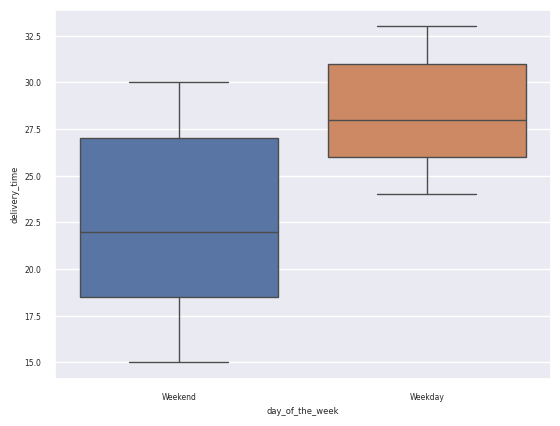

In [51]:
# Write the code here

avr_del_time = df.groupby('day_of_the_week')[['delivery_time']].agg(['mean','median', 'sum','count','std']).transpose()
print(avr_del_time)
print("\n")
sns.boxplot(x = df['day_of_the_week']
            , y = df['delivery_time']
            , hue = df['day_of_the_week'])

#### Observations:


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
This dataset of 1898 rows and 9 columns contains information about restaurant orders (not itemized) during a given period (not provided) of a total of 178 restaurants differentiating them by cuisine_type (14 different categories), rating (x - 5), and order day of the week (weekend vs weekday). Most customers order 1 time (65%) or 2 (22%) (total of 87% ordered 1 or 2x). Most customers

Some of the conclusions can be drawn from the data:

* *Weekends vs. Weekdays*:
  * While a weekend has only 2 days compared to 5 day weekday period, there are 1.5x more orders (count) during the weekend ~ equivalent to also ~1.5x total sales (sum).

* *Cuisine type:*
  * The most popular cuisine type is "American" followed by Japanese and Italian

*  *Rating:*
  *

*  There was no linear relation between most of the numerical variables: delivery time, cost of order or preparation time. Variables like cuisine type did not show a substantial difference in these variables.



### Recommendations:

*  Data augmentation:

---